# Dissipation and adiabatic index in a real TDE sim
For higher $\gamma$, the thermalisation efficiency is lower, but most of the
dissipation still happens at high $\gamma$, because the kinetic energy is very
high for those gas, that a slightly lower thermalization efficiency (goes from 1
to 0.56 so never too low) doesn't prohibit their dissipation from dominating.

In [2]:
%load_ext autoreload
%autoreload 2
import unyt as u
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

import os

import richio
import nb, dev

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
path = "/data1/projects/pi-rossiem/TDE_data/R0.47M0.5BH10000beta1S60n1.5ComptonHiResNewAMR/snap_21"
snap = richio.load(path)

In [4]:
gamma = 1 + snap.P / snap.sie / snap.rho

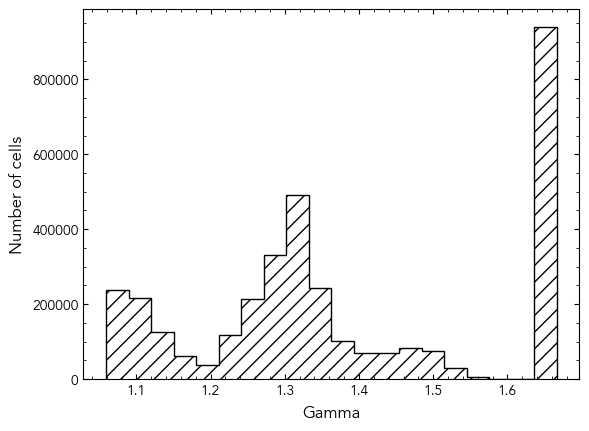

In [ ]:
plt.hist(gamma, bins=20, histtype="step", color="k", hatch="//")
plt.xlabel(r"Gamma")
plt.ylabel(r"Number of cells")
# plt.savefig("../reports/figures/adiabatic-index/gamma0.pdf")
plt.show()

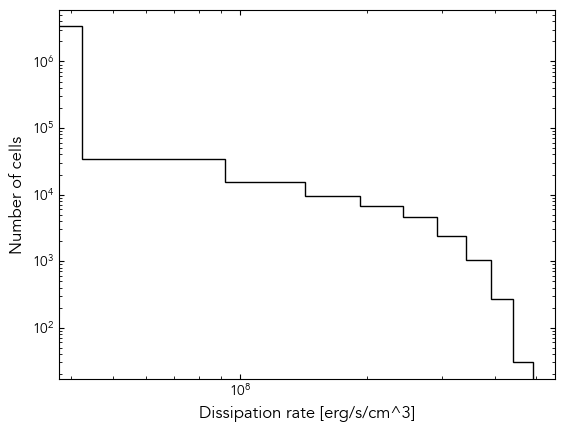

In [ ]:
plt.hist(snap.dissipation.in_cgs(), color="k", histtype="step")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Dissipation rate [erg/s/cm^3]")
plt.ylabel("Number of cells")

# plt.savefig("../reports/figures/adiabatic-index/diss-rate0.pdf")
plt.show()

/home/hey4/.conda/envs/richanalysis/lib/python3.13/site-packages/unyt/array.py:1832: RuntimeWarning: invalid value encountered in log10
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


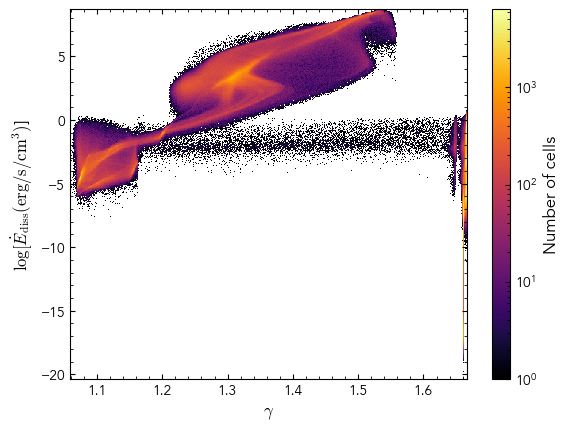

In [ ]:
x = gamma
y = np.log10(snap.dissipation.in_cgs())
y_isnan = np.isnan(y)
x = x[~y_isnan]
y = y[~y_isnan]

plt.hist2d(x, y, bins=500, norm=colors.LogNorm(), cmap="inferno")
plt.colorbar(label="Number of cells")
plt.xlabel(r"$\gamma$")
plt.ylabel(r"$\log[\dot E_\mathrm{diss} \mathrm{(erg/s/cm^3)}$]")
# plt.savefig("../reports/figures/adiabatic-index/hist2d-gamma-Ediss0.png", dpi=300)
plt.show()

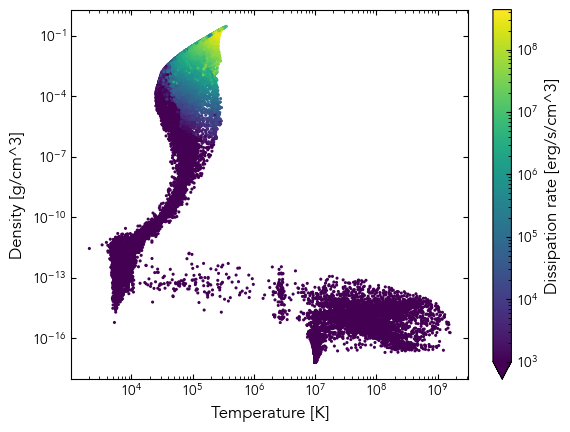

In [ ]:
# Select positive dissipation
diss = snap.dissipation[::100].in_cgs()
filter = diss > 0
diss = diss[filter]

plt.scatter(snap.T[::100][filter], snap.rho[::100][filter].in_cgs(),
    c=diss, 
    norm=colors.LogNorm(vmin=1e3),
    marker=".", s=6)
plt.colorbar(label="Dissipation rate [erg/s/cm^3]", extend="min")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Temperature [K]")
plt.ylabel("Density [g/cm^3]")
# plt.savefig("../reports/figures/adiabatic-index/diss-on-Trho-plane0.png", dpi=300)
plt.show()

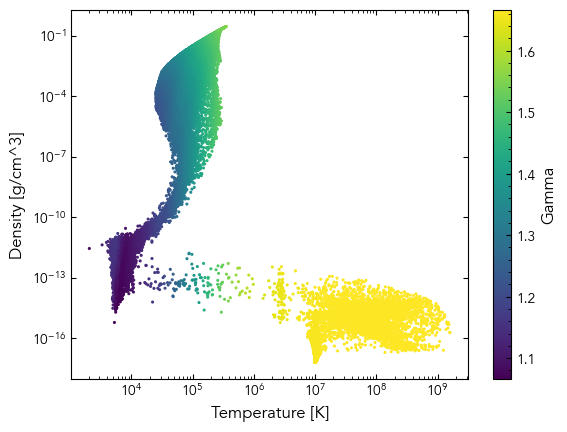

In [ ]:
plt.scatter(snap.T[::100], snap.rho[::100].in_cgs(), c=gamma[::100], marker=".", s=6)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Temperature [K]")
plt.ylabel("Density [g/cm^3]")
plt.colorbar(label="Gamma")
# plt.savefig("../reports/figures/adiabatic-index/gamma-on-Trho-plane0.png", dpi=300)
plt.show()

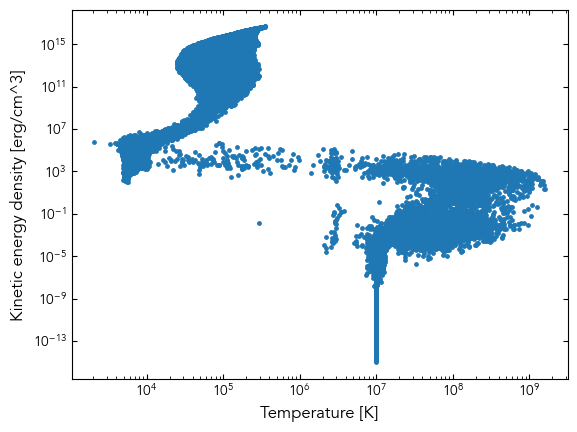

In [ ]:
# Highest dissipation happens at highest kinetic energy
ek = 0.5 * snap.rho[::100] * (snap.vx[::100]**2 + snap.vy[::100]**2 + snap.vz[::100]**2)
plt.scatter(snap.T[::100], ek.in_cgs(), s=6)
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Temperature [K]")
plt.ylabel("Kinetic energy density [erg/cm^3]")
plt.show()

## A mid plane slice

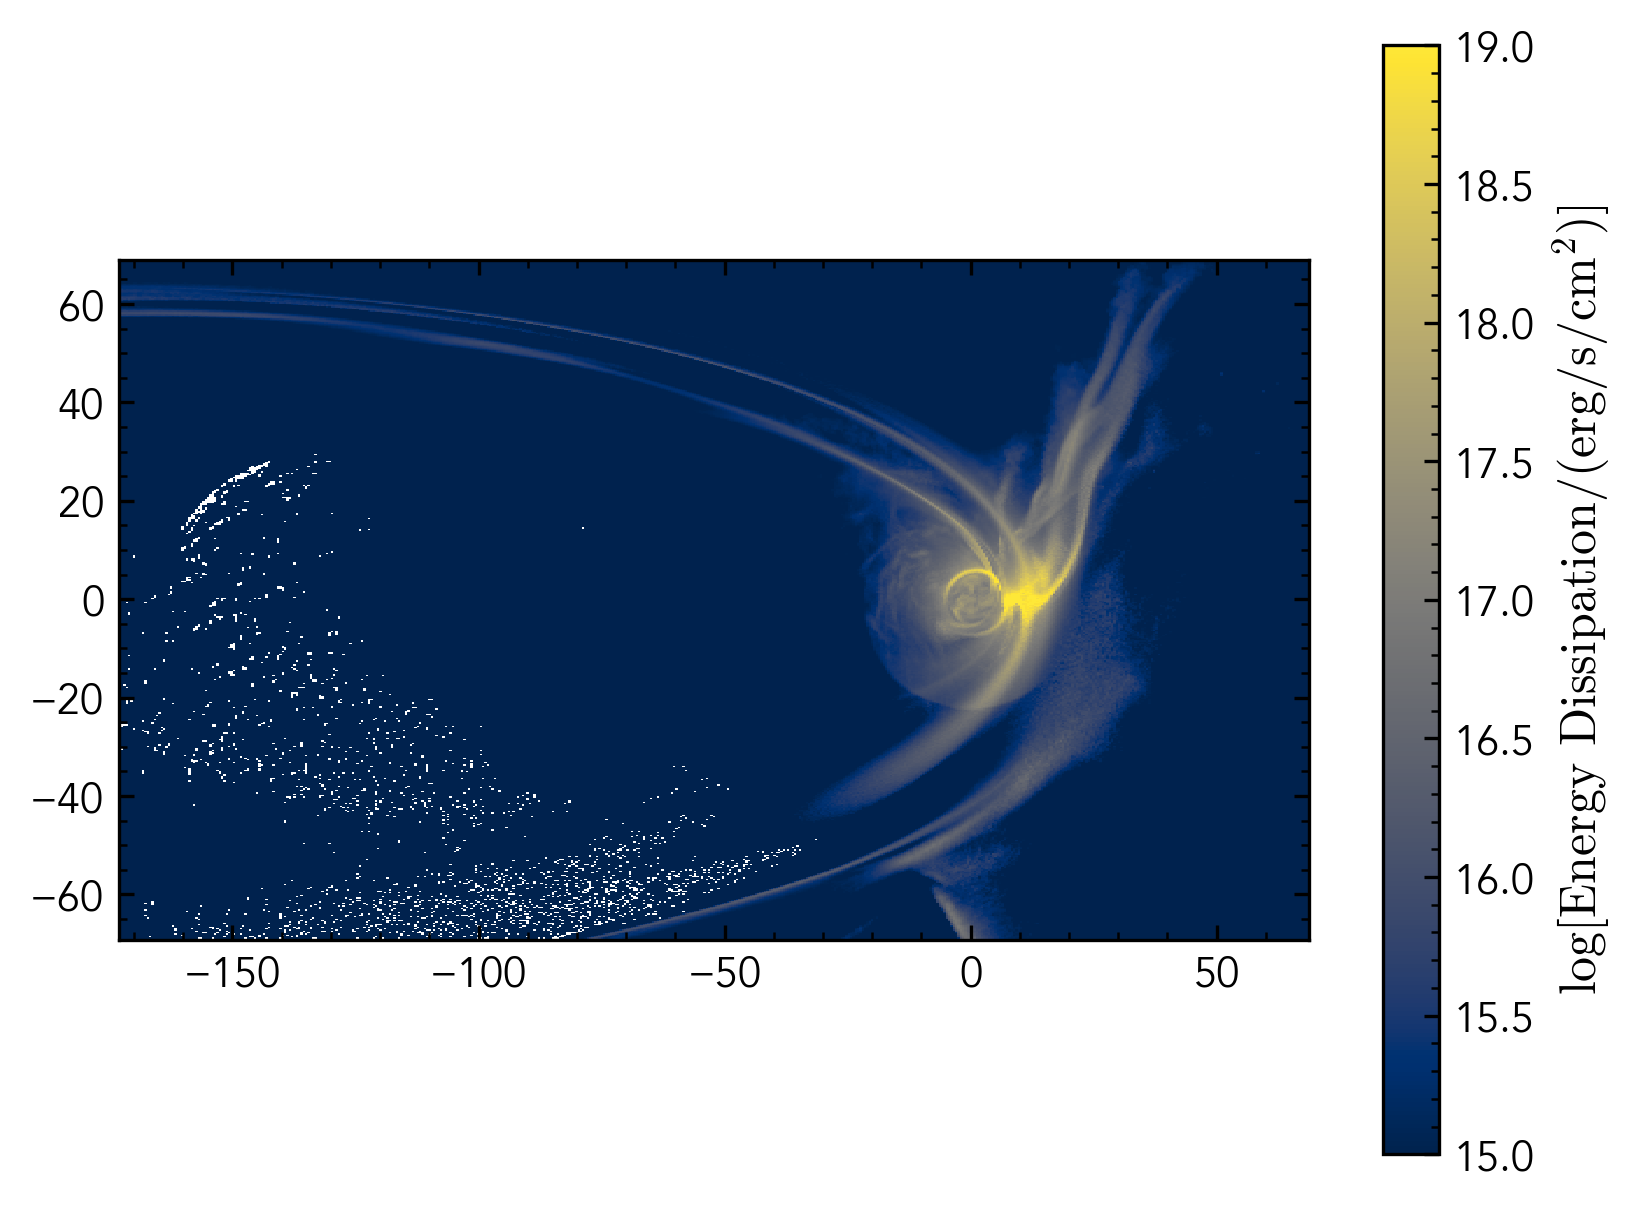

In [ ]:
beta = 1
mstar = .5 * richio.units.mscale
rstar = .47 * richio.units.lscale
mbh = 10**4 * richio.units.mscale
rt = rstar * (mbh/mstar)**(1/3)

ra = rt**2 / rstar #2 * Rt * (Mbh/mstar)**(1/3)

nozzle_box = u.unyt_array([-3*rt, -3*rt, -2*rt, 3*rt, 3*rt, 2*rt])
big_box = u.unyt_array([-6*ra, -4*ra, -2*ra, 2.5*ra, 3*ra, 2*ra])
# else_box = u.unyt_array([-3*ra, -2*ra, -0.8*ra, 2*ra, 2*ra, 0.8*ra])

ax, im, proj_data = snap.plots.projection(data=snap.dissipation, 
                                      x="CMx", 
                                      y="CMy", 
                                      z="CMz", 
                                      res=(512, 512, 513),
                                      box_size=u.unyt_array([-0.5*ra, -0.2*ra, -0.1*ra, 0.2*ra, 0.2*ra, 0.1*ra]),
                                      label_latex=r"\text{Energy Dissipation}",
                                      unit_latex=r"\mathrm{(erg/s/cm^2)}",
                                      cmap="cividis",
                                      vmin=15,
                                      vmax=19,
                                    )
plt.gca().set_aspect("equal", adjustable="box")
plt.show()

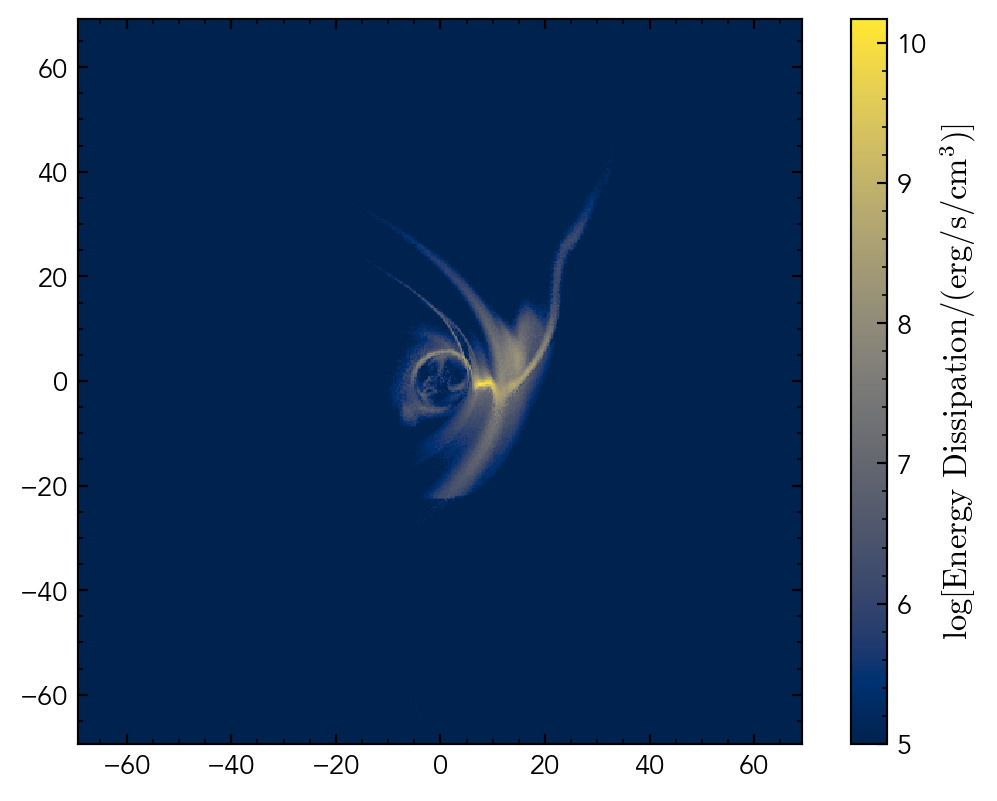

In [ ]:
ax, im, slice_data = snap.plots.slice(data=np.abs(snap.dissipation), 
                                      x="CMx", 
                                      y="CMy", 
                                      z="CMz", 
                                      res=(512, 512),
                                      slice_coord=0,
                                      box_size=u.unyt_array([-0.2*ra, -0.2*ra, 0.2*ra, 0.2*ra]),
                                      label_latex=r"\text{Energy Dissipation}",
                                      unit_latex=r"\mathrm{(erg/s/cm^3)}",
                                      cmap="cividis",
                                      vmin=5,
                                    )
plt.gca().set_aspect("equal", adjustable="box")
plt.show()